In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [4]:
companies=pd.read_csv('D:/kishore/1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
labelencoder = LabelEncoder()
companies['State'] = labelencoder.fit_transform(companies['State'].astype(str))
X=companies.values[:,:-1]
y=companies.values[:,4]

<Axes: >

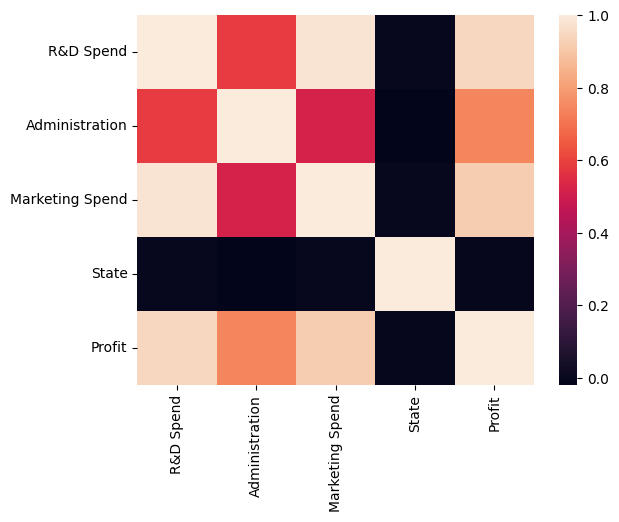

In [6]:
sns.heatmap(companies.corr())

In [7]:
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])
    ],
    remainder='passthrough')

In [8]:
X = column_transformer.fit_transform(X)

In [9]:
X=X[:,1:]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2,random_state=0) # test_size=0.2 means 20% 
#of data for tesing

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
re=LinearRegression()
re.fit(X_train,y_train)

LinearRegression()

In [14]:
y_predict = re.predict(X_test)
print(y_predict)        # this will predict 20% of data as  200 predictions in 1000 rows

[ 89790.61532916  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719687
 164597.05380606  53222.82667402  66950.1905099  150566.43987004
 126915.20858596  59337.85971051 177513.91053061  75316.28143051
 118248.14406603 164574.40699901 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772747  53831.07669091  56881.41475225
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649623  63969.95996744 108857.91214126
 186014.72531987 171442.64130747 174644.26529204 117671.49128195
  96731.37857434 165452.25779409 107724.34331255  50194.54176914
 116513.89532179  58632.48986821 158416.46827609  78541.4852161
 159727.66671743 131137.87699644 184880.70924515 174609.08266879
  93745.66352059  78341.13383418 180745.90439079  84461.61490552
 142900.90602902 170618.44098396  84365.09530839 105307.3716218
 141660.07290786  52527.3434

In [15]:
print(re.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [16]:
print(re.intercept_)

-51035.22972403464


In [17]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)


0.9112695892268834

In [18]:
mean_squared_error(y_test,y_predict)

192148061.81507257

In [23]:
line=np.polyfit(y_test,y_predict,1)

In [24]:
x=np.linspace(min(y_test),max(y_test),100)

In [25]:
y=line[0]*x+line[1]

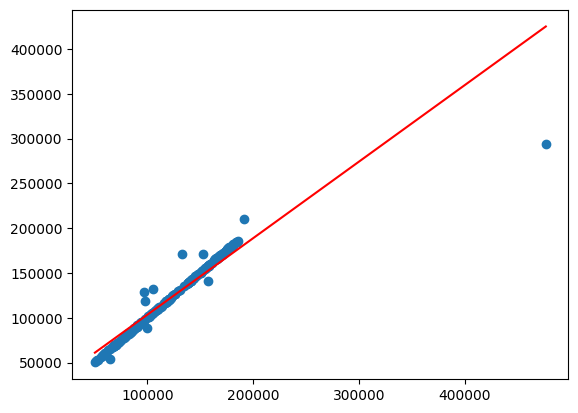

In [26]:
plt.scatter(y_test,y_predict)
plt.plot(x,y,color='red')
plt.show()